### Fill in your name, student id number and email address
#### name: Shadman Ishraq
#### student id: 2205047
#### email: shishr@utu.fi

## Data analysis and knowledge discovery - Exercise 3: Unsupervised learning

This is the template for the third exercise. The purpose of this exercise is to familiarize yourself with the basics of unsupervised learning by using the agglomerative hierarchical clustering and k-means clustering algorithms to find patterns.

The data set utilised in this exercise is a simplified and downsampled version of a knowledge discovery and data mining competition data set. The data will be available on the course's Moodle page. For those who are interested, the original data can be found at https://kdd.ics.uci.edu/databases/kddcup99/kddcup99.html. However, please make sure to **use the version on Moodle** as `ex3_network_data.csv`. The data is described below.

The data set contains samples of network activity simulated in a military network environment. There are different types of malicious activity, and also activity that is considered normal. It is **not necessary** to understand the details of the data set in order to complete the exercise.

In addition to normal activity, there are 3 types of malicious activity - denial of service, unauthorized remote login, and network probing (e.g. port scanning) - simulated in a military network environment. There are 500 samples of each class. There are 6 numeric features, described below:

`src_bytes`: number of bytes from source to destination\
`dst_bytes`: number of bytes from destination to source\
`duration`: length of connection (seconds)\
`count`: number of connections to the same host as the current connection in the past two seconds\
`serror_rate`: percentage of connections that have SYN errors\
`rerror_rate`: percentage of connections that have REJ errors

In real applications, visualizing and cleaning the data are important steps. However, in this exercise you can treat the data as given, and focus on the unsupervised methods.

Please consider the following things when returning your notebook:

 - As in the two previous exercises, the grading scale is failed/passed/passed with honors.
 
 - For a passing grade each part of the exercise, except for the BONUS, must be completed, and all questions should be answered. Some mistakes are allowed as long as you clearly attempt to solve all the exercises.
 
 - For doing both the exercise and the optional bonus task sufficiently well, you will be awarded one bonus point for the exam.
 
 - All the cells in the finished notebook should run without crashing. Please delete unnecessary cells. As a good rule of thumb, use "Restart and run all" on the finished notebook to make sure it runs without errors and produces the expected output.

 - Remember to comment your code to explain how it works and what you intend for it to do.
 
 - Answer the questions asked in the assignments in Markdown cells.
 
 - If you are having problems with this exercise, try an online search first, but don't just copy-paste any code you find. See exercise guidelines in the Moodle page of this course. If you can't find a solution to your problem, ask for advice in the course discussion forum on Moodle or contact oskari.s.heikkinen@utu.fi.
 
 - If/when you look things up during this exercise, please cite your sources (e.g. a link to a web page). It's better to cite too much than too little.

### Library imports, Jupyter Notebook settings etc.

The below libraries are sufficient to complete the exercise. You can import additional functionality here if you want.

In [164]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score
from scipy.cluster.hierarchy import linkage, dendrogram

%matplotlib inline

### Read the data

- Download the exercise 3 data on the Moodle page of this course.
- Read the data into a Pandas dataframe.
- Display a few rows and some basic information to make sure the data was loaded correctly

In [165]:
network_df = pd.read_csv('ex3_network_data.csv')
network_df.head(10)

,src_bytes,dst_bytes,duration,count,serror_rate,rerror_rate,class
0,0,0,0,223,1.0,0.0,denial_of_service
1,1032,0,0,511,0.0,0.0,denial_of_service
2,520,0,0,511,0.0,0.0,denial_of_service
3,1032,0,0,510,0.0,0.0,denial_of_service
4,520,0,0,448,0.0,0.0,denial_of_service
5,1032,0,0,511,0.0,0.0,denial_of_service
6,520,0,0,452,0.0,0.0,denial_of_service
7,1032,0,0,511,0.0,0.0,denial_of_service
8,1032,0,0,511,0.0,0.0,denial_of_service
9,520,0,0,439,0.0,0.0,denial_of_service


In [166]:
network_df.describe()

,src_bytes,dst_bytes,duration,count,serror_rate,rerror_rate
count,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.00000
mean,402.324500,382.56600,20.246500,111.158000,0.059415,0.14014
std,464.815917,861.81793,241.867267,198.399713,0.234554,0.34661
min,0.000000,0.00000,0.000000,1.000000,0.000000,0.00000
25%,8.000000,0.00000,0.000000,1.000000,0.000000,0.00000
50%,286.500000,0.00000,0.000000,2.000000,0.000000,0.00000
75%,748.000000,146.00000,0.000000,105.250000,0.000000,0.00000
max,4703.000000,4982.00000,4776.000000,511.000000,1.000000,1.00000


### Part 1: Preprocess and visualize the data

 - Perform z-score standardization on the features to ensure that all features have the same scale.
 
 - Project the data to two dimensions by using principal component analysis (PCA) and visualize the resulting two-dimensional data in a scatter plot. Don't color the scatter plot yet.
 
 - Does it look like there are clear clusters? Don't worry if they're hard to see.

In [167]:
# Selecting numeric features for scaling
numeric_features = list(network_df.columns)
numeric_features.remove('class')

object = StandardScaler()
numeric_features_scaled = pd.DataFrame(object.fit_transform(network_df[numeric_features]), columns=numeric_features)

# accumulating with the non numeric features
all_features_scaled = pd.concat([numeric_features_scaled, network_df['class']], axis=1)
all_features_scaled.head()

,src_bytes,dst_bytes,duration,count,serror_rate,rerror_rate,class
0,-0.865773,-0.444017,-0.08373,0.563862,4.011105,-0.404417,denial_of_service
1,1.355016,-0.444017,-0.08373,2.015840,-0.253374,-0.404417,denial_of_service
2,0.253229,-0.444017,-0.08373,2.015840,-0.253374,-0.404417,denial_of_service
3,1.355016,-0.444017,-0.08373,2.010798,-0.253374,-0.404417,denial_of_service
4,0.253229,-0.444017,-0.08373,1.698219,-0.253374,-0.404417,denial_of_service


In [168]:
#applying PCA
pca = PCA(n_components=2)
pca_df = pd.concat([pd.DataFrame(pca.fit_transform(all_features_scaled[numeric_features])), network_df['class']], axis=1)

Text(11.069444444444445, 0.5, 'PCA_2')

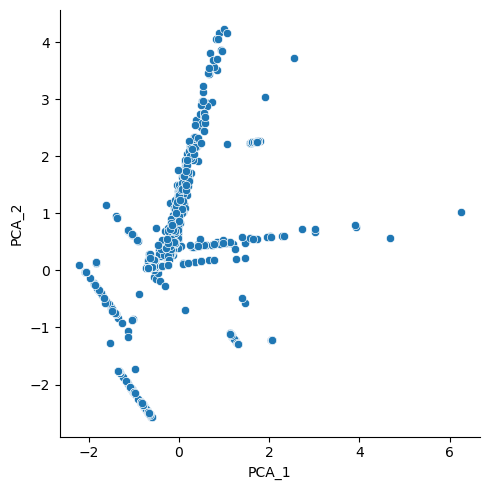

In [169]:
#visualization

import seaborn as sns

sns.relplot(data=pca_df, x=0, y=1)

plt.xlabel("PCA_1")
plt.ylabel("PCA_2")


There is no clustering because of that it is not that clear.

Because clustering is an unsupervised learning method, the `class` column is completely unnecessary for most of these tasks. You will only need the `class` column in **Part 4**, where it's used to compute a performance metric and to visually compare clustering results to the classes.

### Part 2a: Agglomerative hierarchical clustering
 
 - Cluster the data into 4 clusters using agglomerative hierarchical clustering. Try different values for the "linkage" parameter.
 
 - Use the z-score standardized 6-dimensional data for clustering - not the principal components!
 
 - What is the significance of the linkage criterion in a hierarchical clustering algorithm?
 
 - Evaluate the clustering performance for each linkage criterion using a metric called "silhouette score".
 
 - What does silhouette score quantify and how is it computed?

In [170]:
#agglomerative clustering 

ward_clustering = AgglomerativeClustering(n_clusters=4, linkage='ward').fit(numeric_features_scaled)
average_clustering = AgglomerativeClustering(n_clusters=4, linkage='average').fit(numeric_features_scaled)
minimum_clustering = AgglomerativeClustering(n_clusters=4, linkage='single').fit(numeric_features_scaled)
maximum_clustering = AgglomerativeClustering(n_clusters=4, linkage='complete').fit(numeric_features_scaled)


In [171]:
#printing silhouette score

print(silhouette_score(numeric_features_scaled, ward_clustering.labels_))
print(silhouette_score(numeric_features_scaled, average_clustering.labels_))
print(silhouette_score(numeric_features_scaled, minimum_clustering.labels_))
print(silhouette_score(numeric_features_scaled, maximum_clustering.labels_))

0.6299185426636938
0.6241907400676748
0.7288757664397134
0.48157598037192545


scikit-learn.org describes that,

Which distance should be used between sets of observations is determined by the linking criterion. The cluster pairs that minimize this criterion will be combined by the algorithm.

Ward clustering reduces the variance of the combined clusters.

Average clustering uses the mean of the separations between each observation in the two sets.

The complete clustering linkage makes use of the greatest distances possible between each observation in both sets.

The single clustering uses the shortest distance between any two observations in each collection.


The mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample are used to determine the Silhouette Coefficient. (b - a) / max is the Silhouette Coefficient for a sample (a, b). To be clear, b is the separation between a sample and the closest cluster to which it does not belong. Keep in mind that the Silhouette Coefficient is only defined if there are 2 labels, n labels, and n samples, minus 1.

The mean Silhouette Coefficient over all samples is what this method returns.
The ideal value is 1, whereas the undesirable value is -1. Values close to 0 signify clusters that overlap. Negative results typically signify that a sample was placed in the incorrect cluster because another cluster would have better fit the sample.

### Part 2b: Dendrograms

 - Plot dendrograms to visualize the merging processes.
 - For this you will need a linkage matrix. Hint: while you can extract one from a fitted AgglomerativeClustering object, it is much easier to use the scipy implementation (scipy.cluster.hierarchy.linkage).
 - Compute the linkage matrix using both `average` and `complete` linkage, and plot the dendrograms using scipy.cluster.hierarchy.dendrogram).
 - Truncate the dendrogram so that three levels of the dendrogram tree are visible for better readability.
 - How do you interpret the dendrograms? How do they differ?

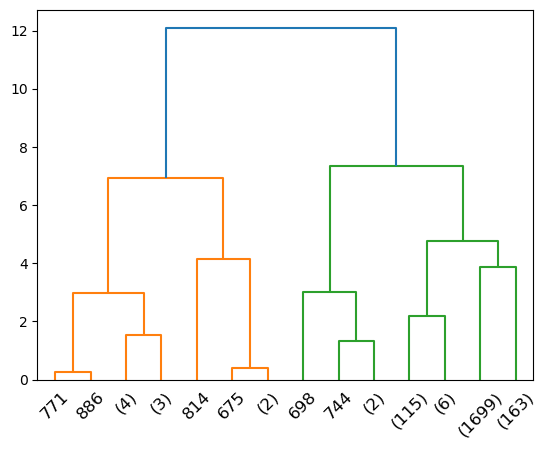

In [172]:
# plotting dendrogram average
average_matrix = linkage(numeric_features_scaled, 'average')
dendrogram(average_matrix, truncate_mode='level', p=3, leaf_rotation=45)
plt.show()

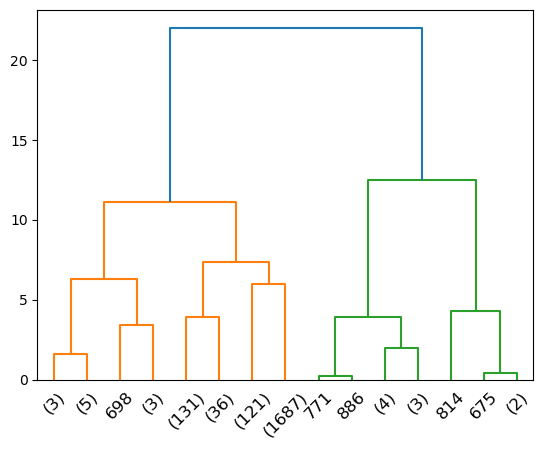

In [173]:
# plotting dendrogram complete
average_matrix = linkage(numeric_features_scaled, 'complete')
dendrogram(average_matrix, truncate_mode='level', p=3, leaf_rotation=45)
plt.show()

The dendrogram's x-axis indicates which data points are part of a specific cluster, while the y-axis represents the degree of similarity between clusters.The difference between the two dendogram is the different cluster numbers.

### Part 3: _k_-means clustering

 - Perform _k_-means clustering on the data. Use 4 clusters.
 - Evaluate the clustering performance using silhouette score.
 - Experiment with some other numbers of clusters. Does the data fit better into a different number of clusters according to silhouette score?

In [174]:
k_means = KMeans(n_clusters=4)
k_means.fit(numeric_features_scaled)
predict = k_means.predict(numeric_features_scaled)

#clustering pca

pca_clustered = pd.concat([pca_df, pd.Series(predict, name='cluster_num_k_means')], axis=1)
pca_clustered.head(10)

,0,1,class,cluster_num_k_means
0,-0.784767,-2.372303,denial_of_service,3
1,2.056440,-1.222154,denial_of_service,2
2,1.306228,-1.295604,denial_of_service,2
3,2.053927,-1.219385,denial_of_service,2
4,1.147854,-1.121159,denial_of_service,2
5,2.056440,-1.222154,denial_of_service,2
6,1.157909,-1.132235,denial_of_service,2
7,2.056440,-1.222154,denial_of_service,2
8,2.056440,-1.222154,denial_of_service,2
9,1.125229,-1.096238,denial_of_service,2


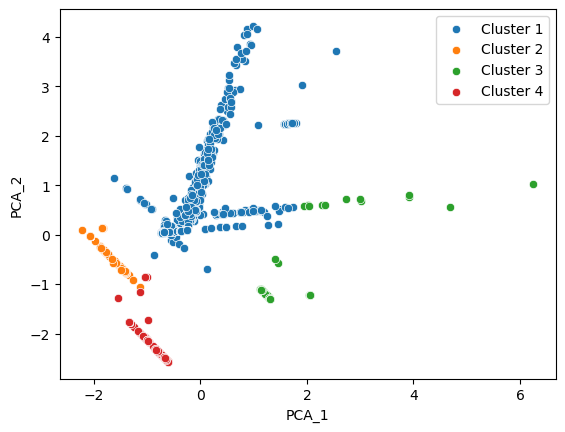

In [175]:
clust_1 = pca_clustered[pca_clustered.cluster_num_k_means == 0]
clust_2 = pca_clustered[pca_clustered.cluster_num_k_means == 1]
clust_3 = pca_clustered[pca_clustered.cluster_num_k_means == 2]
clust_4 = pca_clustered[pca_clustered.cluster_num_k_means == 3]


# plotting the clusters
sns.scatterplot(data=clust_1,x=0,y=1)
sns.scatterplot(data=clust_2,x=0,y=1)
sns.scatterplot(data=clust_3,x=0,y=1)
sns.scatterplot(data=clust_4,x=0,y=1)


plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.legend(labels=['Cluster 1','Cluster 2','Cluster 3','Cluster 4'])

In [176]:
#silhoulette score clustering performance

silhouette_score(numeric_features_scaled, k_means.labels_)

0.634040977469723

In [177]:
#experimenting with varoius numbers of cluster

silhouette = []
for i in range(2,15):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(numeric_features_scaled)
    silhouette.append(silhouette_score(numeric_features_scaled, kmeans.labels_))
    print(silhouette)

max = silhouette[0]
fit = 0
for i in range(1,len(silhouette)):
    if silhouette[i] > max:
        max = silhouette[i]
        fit = i+2
print(F'Best fit cluster : {fit} ')



[0.4210817924927892]
[0.4210817924927892, 0.5420809851215344]
[0.4210817924927892, 0.5420809851215344, 0.634040977469723]
[0.4210817924927892, 0.5420809851215344, 0.634040977469723, 0.6581598820518922]
[0.4210817924927892, 0.5420809851215344, 0.634040977469723, 0.6581598820518922, 0.7547927328720325]
[0.4210817924927892, 0.5420809851215344, 0.634040977469723, 0.6581598820518922, 0.7547927328720325, 0.7727553051521152]
[0.4210817924927892, 0.5420809851215344, 0.634040977469723, 0.6581598820518922, 0.7547927328720325, 0.7727553051521152, 0.7870033283213129]
[0.4210817924927892, 0.5420809851215344, 0.634040977469723, 0.6581598820518922, 0.7547927328720325, 0.7727553051521152, 0.7870033283213129, 0.7824838147862556]
[0.4210817924927892, 0.5420809851215344, 0.634040977469723, 0.6581598820518922, 0.7547927328720325, 0.7727553051521152, 0.7870033283213129, 0.7824838147862556, 0.7578128013292783]
[0.4210817924927892, 0.5420809851215344, 0.634040977469723, 0.6581598820518922, 0.7547927328720325

I have tried with 13 numbers of cluster but the maximum score can be found with 8 clusters.

#### Rand score briefly described

Rand score is a measure of similarity between two partitions of a set of elements - in this case true classes and clusters found by the clustering algorithm - and it is one of the most frequently used performance metrics for clustering. It is computed by considering each pair of elements in the dataset and counting pairs of elements as follows:
 
         a: number of pairs such that the elements are in the same class and in the same cluster
         b: number of pairs such that the elements are in different classes and in different clusters
         c: number of pairs such that the elements are in the same class but in different clusters
         d: number of pairs such that the elements are in different classes but in the same cluster
     
     Given a, b, c, d, the formula for rand index is:
     
         rand_index = (a+b)/(a+b+c+d).
     
"Adjusted Rand index" is corrected for chance by using maximum and expected values of Rand index.

        adj_rand_index = (rand_index - expected_rand_index) / (max_rand_index - expected_rand_index)

###  Part 4a: Compare the clusters with the true labels (hierarchical clustering)
 
 - Cluster the data into 4 clusters using agglomerative hierarchical clustering.
 - Choose the linkage criterion that had the best silhouette score performance in Part 2a.
 - Visualize the data again using PCA, this time coloring the scatter plot based on the true class labels. Visually compare the two scatter plots: how well do the clusters found by the clustering algorithm match the true classes? Place the two scatter plots so that they can easily be compared (e.g. in subplots next to each other in the same figure).
 - For an objective evaluation of the clustering, compute the adjusted Rand score (use the scikit-learn implementation) using the true labels and the labels predicted by clustering algorithm. How do you interpret the result?
 - If the results seem unimpressive, don't get discouraged - clustering "real life" data sets to match classes is a difficult task, and a low Rand score does not necessarily mean that you have made a mistake.

In [194]:
aggl_cluster = AgglomerativeClustering(n_clusters=4, linkage='single').fit(numeric_features_scaled)
pca_clustered_new = pd.concat([pca_clustered, pd.Series(agglo_clustering.labels_, name='aggl_cluster')], axis=1)
pca_clustered_new.head(10)


,0,1,class,cluster_num_k_means,aggl_cluster
0,-0.784767,-2.372303,denial_of_service,3,0
1,2.056440,-1.222154,denial_of_service,2,0
2,1.306228,-1.295604,denial_of_service,2,0
3,2.053927,-1.219385,denial_of_service,2,0
4,1.147854,-1.121159,denial_of_service,2,0
5,2.056440,-1.222154,denial_of_service,2,0
6,1.157909,-1.132235,denial_of_service,2,0
7,2.056440,-1.222154,denial_of_service,2,0
8,2.056440,-1.222154,denial_of_service,2,0
9,1.125229,-1.096238,denial_of_service,2,0


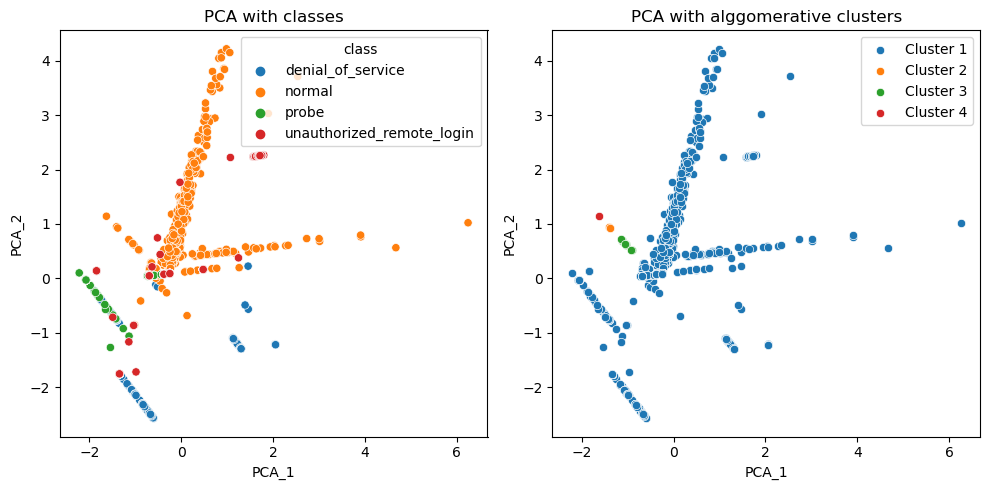

In [211]:
fig, ax = plt.subplots(ncols=2, figsize=(10,5))

# plotting pca 
sns.scatterplot(data=pca_with_clusters, x=0, y=1, ax=ax[0], hue='class')

clust_1 = pca_clustered_new[pca_clustered_new.aggl_cluster == 0]
clust_2 = pca_clustered_new[pca_clustered_new.aggl_cluster == 1]
clust_3 = pca_clustered_new[pca_clustered_new.aggl_cluster == 2]
clust_4 = pca_clustered_new[pca_clustered_new.aggl_cluster == 3]


# plotting agglomerative clusters
sns.scatterplot(data=clust_1,x=0,y=1, ax=ax[1])
sns.scatterplot(data=clust_2,x=0,y=1, ax=ax[1])
sns.scatterplot(data=clust_3,x=0,y=1, ax=ax[1])
sns.scatterplot(data=clust_4,x=0,y=1, ax=ax[1])

ax[0].set_title('PCA with classes')
ax[1].set_title('PCA with alggomerative clusters')
ax[0].set_xlabel('PCA_1')
ax[1].set_xlabel('PCA_1')
ax[0].set_ylabel('PCA_2')
ax[1].set_ylabel('PCA_2')
ax[1].legend(labels=['Cluster 1','Cluster 2','Cluster 3','Cluster 4'])

plt.tight_layout()


In [205]:
pca_clustered_new['class_labels'] = pd.factorize(pca_clustered_new['class'])[0]
pca_clustered_new.head()

,0,1,class,cluster_num_k_means,aggl_cluster,class_labels
0,-0.784767,-2.372303,denial_of_service,3,0,0
1,2.056440,-1.222154,denial_of_service,2,0,0
2,1.306228,-1.295604,denial_of_service,2,0,0
3,2.053927,-1.219385,denial_of_service,2,0,0
4,1.147854,-1.121159,denial_of_service,2,0,0


In [210]:
adjusted_rand_score(pca_clustered_new['class_labels'], pca_clustered_new['aggl_cluster'])

0.00011807828578910034

As described in scikit-learn.org The Rand Index computes a similarity measure between two clusterings by considering all pairs of samples and counting pairs that are assigned in the same or different clusters in the predicted and true clusterings.
The nearer the score gets to 1 the clusterings are identical. Comparing to the value 0.000118 ,it is not identical.

### Part 4b: Compare the clusters with true labels (_k_-means clustering)

 - Repeat the above steps, but this time using _k_-means clustering instead of hierarchical clustering.
 - Which performs better according to the adjusted Rand score?

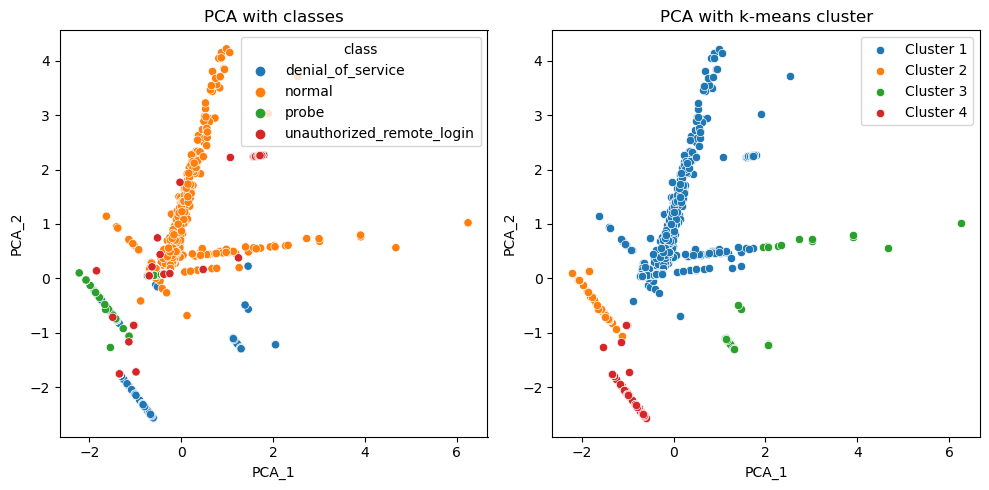

In [213]:
fig, ax = plt.subplots(ncols=2, figsize=(10,5))

# plotting pca 
sns.scatterplot(data=pca_with_clusters, x=0, y=1, ax=ax[0], hue='class')

clust_1 = pca_clustered_new[pca_clustered_new.cluster_num_k_means == 0]
clust_2 = pca_clustered_new[pca_clustered_new.cluster_num_k_means == 1]
clust_3 = pca_clustered_new[pca_clustered_new.cluster_num_k_means == 2]
clust_4 = pca_clustered_new[pca_clustered_new.cluster_num_k_means == 3]


# plotting agglomerative clusters
sns.scatterplot(data=clust_1,x=0,y=1, ax=ax[1])
sns.scatterplot(data=clust_2,x=0,y=1, ax=ax[1])
sns.scatterplot(data=clust_3,x=0,y=1, ax=ax[1])
sns.scatterplot(data=clust_4,x=0,y=1, ax=ax[1])

ax[0].set_title('PCA with classes')
ax[1].set_title('PCA with k-means cluster')
ax[0].set_xlabel('PCA_1')
ax[1].set_xlabel('PCA_1')
ax[0].set_ylabel('PCA_2')
ax[1].set_ylabel('PCA_2')
ax[1].legend(labels=['Cluster 1','Cluster 2','Cluster 3','Cluster 4'])

plt.tight_layout()

In [214]:
adjusted_rand_score(pca_clustered_new['class_labels'], pca_clustered_new['cluster_num_k_means'])

0.2951546107072655

The value of the k-means cluster is 0.2952 which is higher than the alggomerative clusters.So, the k-means cluster performs better.